In [11]:
# Loading the required library
library(readr) # CSV file I/O, e.g. the read_csv function
library(tree) # Decision Tree
library("e1071") #SVM
library(neuralnet)
library(utils)    #for importing the file
library(mlbench)  #for correlation matrix
library(caret)    #for models
library(ggplot2)  #for plotting graphs
library(rpart)

In [12]:
# Loading data
dataset <- read.csv('../input/capstone-projectibm-employee-attrition-prediction/IBM HR Data new.csv')

In [13]:
head(dataset)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee.Source
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,80,0,8,0,1,6,4,0,5,Referral
2,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,80,0,8,0,1,6,4,0,5,Referral
3,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,7,⋯,80,0,8,0,1,6,4,0,5,Referral
4,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,8,⋯,80,0,8,0,1,6,4,0,5,Referral
5,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,9,⋯,80,0,8,0,1,6,4,0,5,Referral
6,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,10,⋯,80,3,21,2,3,5,0,0,2,Company Website


In [14]:
# Removing the variable
dim(dataset)
# Analysis point of view these variable are not making any impact 
dataset$EmployeeCount <- NULL
dataset$EmployeeNumber <- NULL
dataset$StandardHours <- NULL
dataset$Over18 <- NULL
dataset$Application.ID <- NULL
dataset$Employee.Source <- NULL

dataset <- na.omit(dataset)
dim(dataset)

[1] 23436    37

[1] 23303    31

In [15]:
# Converting the numeric variable into factor 
dataset$Education <- factor(dataset$Education)
dataset$EnvironmentSatisfaction <- factor(dataset$EnvironmentSatisfaction)
dataset$JobInvolvement <- factor(dataset$JobInvolvement)
dataset$JobLevel <- factor(dataset$JobLevel)
dataset$JobSatisfaction <- factor(dataset$JobSatisfaction)
dataset$PerformanceRating <- factor(dataset$PerformanceRating)
dataset$RelationshipSatisfaction <- factor(dataset$RelationshipSatisfaction)
dataset$StockOptionLevel <- factor(dataset$StockOptionLevel)
dataset$WorkLifeBalance <- factor(dataset$WorkLifeBalance)

dataset$HourlyRate = as.numeric(dataset$HourlyRate)
dataset$MonthlyIncome = as.numeric(dataset$MonthlyIncome)

In [16]:
head(dataset)
dim(dataset)
levels(dataset$Attrition)[1] = "missing"
levels(dataset$BusinessTravel)[1] = "missing"
levels(dataset$DistanceFromHome)[1] = "missing"
levels(dataset$EducationField)[1] = "missing"
levels(dataset$Gender)[1] = "missing"
levels(dataset$JobRole)[1] = "missing"
levels(dataset$MaritalStatus)[1] = "missing"
levels(dataset$JobSatisfaction)[1] = "missing"
levels(dataset$PercentSalaryHike)[1] = "missing"
levels(dataset$OverTime)[1] = "missing"
levels(dataset$Department)[1] = "missing"

str(dataset)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,⋯,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>
1,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,⋯,3,1,0,8,0,1,6,4,0,5
2,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,⋯,3,1,0,8,0,1,6,4,0,5
3,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,⋯,3,1,0,8,0,1,6,4,0,5
4,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,⋯,3,1,0,8,0,1,6,4,0,5
5,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,⋯,3,1,0,8,0,1,6,4,0,5
6,41,Voluntary Resignation,Travel_Rarely,1102,Sales,1,2,Life Sciences,4,Female,⋯,3,3,3,21,2,3,5,0,0,2


[1] 23303    31

'data.frame':	23303 obs. of  31 variables:
 $ Age                     : int  41 41 41 41 41 41 41 41 41 41 ...
 $ Attrition               : Factor w/ 3 levels "missing","Current employee",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ BusinessTravel          : Factor w/ 4 levels "missing","Non-Travel",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ DailyRate               : int  1102 1102 1102 1102 1102 1102 1102 1102 1102 1102 ...
 $ Department              : Factor w/ 5 levels "missing","1296",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ DistanceFromHome        : Factor w/ 31 levels "missing","1",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Education               : Factor w/ 5 levels "1","2","3","4",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ EducationField          : Factor w/ 9 levels "missing","3",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ EnvironmentSatisfaction : Factor w/ 5 levels "1","2","3","4",..: 2 2 2 2 2 4 1 2 2 2 ...
 $ Gender                  : Factor w/ 5 levels "missing","1",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ HourlyRate              : num  67 67 67 67 67 

In [17]:
# Spliting the modeldata and validation data
set.seed(100)
train <- sample(1:nrow(dataset),nrow(dataset)*.7)
modeldata <- dataset[train,]
validationdata <- dataset[-train,]

In [18]:
head(modeldata)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,⋯,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>
20264,40,Current employee,Travel_Frequently,720,Research & Development,16,4,Medical,3,Male,⋯,3,3,1,5,0,3,5,3,0,4
16968,44,Current employee,Travel_Frequently,602,Human Resources,1,5,Life Sciences,1,Male,⋯,3,4,2,7,5,2,6,2,0,5
3451,39,Current employee,Non-Travel,1485,Research & Development,25,2,Technical Degree,2,Male,⋯,3,4,1,8,4,3,2,2,2,0
3718,39,Current employee,Travel_Frequently,711,Research & Development,4,3,Life Sciences,4,Male,⋯,3,3,0,3,2,3,2,2,2,2
20576,52,Voluntary Resignation,Travel_Rarely,723,Research & Development,8,4,Medical,3,Male,⋯,3,1,0,11,3,2,8,2,7,7
3073,24,Current employee,Travel_Rarely,691,Research & Development,23,3,Medical,3,Female,⋯,3,2,0,25,2,3,3,2,1,2


# C 5.0

In [19]:
library(C50)
X = modeldata[, -which(names(modeldata) == "Attrition")]
tree_boost <- C5.0(x = X, y = modeldata$Attrition, trials = 3)
summary(tree_boost)


Call:
C5.0.default(x = X, y = modeldata$Attrition, trials = 3)


C5.0 [Release 2.07 GPL Edition]  	Mon Dec  7 03:09:37 2020
-------------------------------

Class specified by attribute `outcome'

Read 16312 cases (31 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

Age <= 33:
:...Age <= 21:
:   :...BusinessTravel in {missing,
:   :   :                  Travel_Frequently}: Voluntary Resignation (84)
:   :   BusinessTravel in {Non-Travel,Travel_Rarely}: [S1]
:   Age > 21:
:   :...TotalWorkingYears <= 1:
:       :...BusinessTravel = missing: Current employee (0)
:       :   BusinessTravel = Travel_Frequently:
:       :   :...PercentSalaryHike in {missing,21,22,23,24,25,No,
:       :   :   :                     Yes}: Voluntary Resignation (0)
:       :   :   PercentSalaryHike in {13,20}: Current employee (11)
:       :   :   PercentSalaryHike in {11,12,14,15,16,17,18,19}:
:       :   :   :...JobLevel in {1,2,4}: Voluntary Resignation (69)
:       :   :       JobLe

In [20]:
predict(tree_boost, newdata = validationdata, type = "prob")

,missing,Current employee,Voluntary Resignation
5,0,0.0000000,1.0000000
6,0,1.0000000,0.0000000
12,0,0.0000000,1.0000000
13,0,0.0000000,1.0000000
17,0,0.3283976,0.6716024
21,0,0.3283976,0.6716024
38,0,0.6219718,0.3780282
39,0,0.6219718,0.3780282
40,0,0.6219718,0.3780282
43,0,0.6219718,0.3780282


In [21]:
dt.pred <- predict(tree_boost, newdata = validationdata)
caret::confusionMatrix(validationdata$Attrition, dt.pred)

Confusion Matrix and Statistics

                       Reference
Prediction              missing Current employee Voluntary Resignation
  missing                     0                4                     0
  Current employee            7             5899                    13
  Voluntary Resignation       0               23                  1045

Overall Statistics
                                          
               Accuracy : 0.9933          
                 95% CI : (0.9911, 0.9951)
    No Information Rate : 0.8477          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9741          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: missing Class: Current employee
Sensitivity               0.0000000                  0.9954
Specificity               0.9994273                  0.9812
Pos Pred Value            0.0000000     

In [22]:
rm(X)
rm(tree_boost)

# SVM

In [23]:

svm.model<-svm(
  Attrition~.,
  type="C-classification",
  cost=3,
  data=modeldata,
  cross=3
)
summary(svm.model)


# now we get best parameters 
# gamma and cost
# using this result 
    


Call:
svm(formula = Attrition ~ ., data = modeldata, type = "C-classification", 
    cost = 3, cross = 3)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  3 

Number of Support Vectors:  5800

 ( 3201 2592 7 )


Number of Classes:  3 

Levels: 
 missing Current employee Voluntary Resignation

3-fold cross-validation on training data:

Total Accuracy: 85.60569 
Single Accuracies:
 85.46993 85.52511 85.82199 




In [24]:
dt.pred <- predict(svm.model, newdata = validationdata)
caret::confusionMatrix(validationdata$Attrition, dt.pred)

Confusion Matrix and Statistics

                       Reference
Prediction              missing Current employee Voluntary Resignation
  missing                     0                4                     0
  Current employee            0             5890                    29
  Voluntary Resignation       0              843                   225

Overall Statistics
                                          
               Accuracy : 0.8747          
                 95% CI : (0.8667, 0.8824)
    No Information Rate : 0.9637          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2982          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: missing Class: Current employee
Sensitivity                      NA                  0.8743
Specificity               0.9994278                  0.8858
Pos Pred Value                   NA     

In [25]:
# tuning parameters
# First search 
#gamma.range<-10^(-3:3)
#cost.range<-10^(-2:2)
#tuning<-tune.svm(
#  Attrition~.,
#  type="C-classification",
#  gamma=gamma.range,
#  data=modeldata,
#  tunecontrol=tune.control(sampling="cross",cross=3)
#)
#tuning$best.parameters # best parameters at this point 
## gamma=0.001=10^(-3) and cost=100=10^2

#1-tuning$best.performance # accuracy 
#
#
# Second search
#gamma.range<-10^seq(-3,-1,length=10) # -2 +-1
#cost.range<-10^seq(0,2,length=10) # 1 +-1
#tuning<-tune.svm(
#  Attrition~.,
#  type="C-classification",
#  gamma=gamma.range,
#  cost=cost.range,
#  data=modeldata,
#  tunecontrol=tune.control(sampling="cross",cross=3)
#)
#tuning$best.parameters 

In [26]:
#tuned.model<-svm(
#  Attrition~.,
#  type="C-classification",
#  gamma=0.001668101,
#  cost=35.93814,
#  data=modeldata,
#  cross=3
#)
#summary(tuned.model)

# NN

In [27]:
#Define train control for models using method as "repeatedcv"(repeated K-fold cross-validation)
train_control=trainControl(method="repeatedcv", number=5, repeats=3)

model_nn=train(Attrition~., modeldata, method="nnet", trControl=train_control, verbose=0)

#Predict using model and dataset
predicted_attrition_nn=predict(model_nn,validationdata)

#Measure Accuracy
model_accuracy_nn=sum(predicted_attrition_nn == validationdata$Attrition)/nrow(validationdata)
model_accuracy_nn

# weights:  136
initial  value 13884.198458 
iter  10 value 5889.787312
iter  20 value 5798.790419
iter  30 value 5796.101080
iter  40 value 5793.559293
iter  50 value 5793.086431
iter  60 value 5792.960529
iter  70 value 5792.822384
iter  80 value 5792.741924
final  value 5792.738201 
converged
# weights:  402
initial  value 10269.584148 
iter  10 value 5890.308820
iter  20 value 5788.265244
iter  30 value 5788.252568
final  value 5788.251898 
converged
# weights:  668
initial  value 25223.673472 
iter  10 value 5802.003474
final  value 5801.996084 
converged
# weights:  136
initial  value 20052.847599 
iter  10 value 5849.663858
iter  20 value 5792.169375
iter  30 value 5787.064736
iter  40 value 5786.592814
iter  50 value 5779.872368
iter  60 value 5776.296543
iter  70 value 5752.020973
iter  80 value 5725.841074
iter  90 value 5709.162651
iter 100 value 5603.789247
final  value 5603.789247 
stopped after 100 iterations
# weights:  402
initial  value 15860.545202 
iter  10 value 584

initial  value 10635.910705 
iter  10 value 5794.189701
iter  20 value 5794.047859
final  value 5794.047434 
converged
# weights:  668
initial  value 19694.185834 
iter  10 value 5810.566567
iter  20 value 5764.593112
iter  30 value 5727.339022
iter  40 value 5686.879964
iter  50 value 5648.112911
iter  60 value 5628.781423
iter  70 value 5624.875890
iter  80 value 5618.522836
iter  90 value 5615.946802
iter 100 value 5615.426669
final  value 5615.426669 
stopped after 100 iterations
# weights:  136
initial  value 16065.548466 
iter  10 value 5808.443730
iter  20 value 5797.059633
iter  30 value 5796.784148
iter  40 value 5789.402049
iter  50 value 5776.832081
iter  60 value 5760.195159
iter  70 value 5740.907678
iter  80 value 5725.169955
iter  90 value 5697.958498
iter 100 value 5592.426445
final  value 5592.426445 
stopped after 100 iterations
# weights:  402
initial  value 8579.041987 
iter  10 value 5810.995476
iter  20 value 5802.021959
iter  30 value 5791.118695
iter  40 value 5

initial  value 21206.655574 
iter  10 value 5850.096278
iter  20 value 5799.504320
iter  30 value 5795.234734
iter  40 value 5772.110773
iter  50 value 5729.192808
iter  60 value 5516.420589
iter  70 value 5394.630399
iter  80 value 5261.084101
iter  90 value 5248.503728
iter 100 value 5203.145447
final  value 5203.145447 
stopped after 100 iterations
# weights:  668
initial  value 13368.638825 
iter  10 value 5901.163649
iter  20 value 5805.743576
iter  30 value 5804.827406
iter  40 value 5747.302572
iter  50 value 5704.851796
iter  60 value 5666.822388
iter  70 value 5601.024621
iter  80 value 5453.697117
iter  90 value 5259.037724
iter 100 value 5231.098745
final  value 5231.098745 
stopped after 100 iterations
# weights:  136
initial  value 21592.632556 
iter  10 value 5806.615842
final  value 5802.001342 
converged
# weights:  402
initial  value 11282.460864 
iter  10 value 5802.014567
final  value 5802.007046 
converged
# weights:  668
initial  value 9001.121641 
iter  10 value 5

initial  value 18016.394484 
iter  10 value 5802.695424
iter  20 value 5802.007470
iter  30 value 5801.991254
iter  40 value 5801.485034
iter  50 value 5784.053841
iter  60 value 5750.864422
iter  70 value 5740.207607
iter  80 value 5737.007202
iter  90 value 5730.347415
iter 100 value 5708.771138
final  value 5708.771138 
stopped after 100 iterations
# weights:  668
initial  value 14560.875370 
iter  10 value 5801.842716
final  value 5801.834698 
converged
# weights:  136
initial  value 18592.819088 
iter  10 value 5796.541385
final  value 5794.222946 
converged
# weights:  402
initial  value 14171.595876 
iter  10 value 5794.214021
iter  20 value 5794.048378
final  value 5794.047433 
converged
# weights:  668
initial  value 8515.607160 
iter  10 value 5787.333541
iter  20 value 5787.134665
final  value 5787.134026 
converged
# weights:  136
initial  value 17099.538968 
iter  10 value 5809.904501
iter  20 value 5797.229567
iter  30 value 5793.433939
iter  40 value 5788.910213
iter  50

[1] 0.84666

In [28]:
caret::confusionMatrix(validationdata$Attrition, predicted_attrition_nn)

Confusion Matrix and Statistics

                       Reference
Prediction              missing Current employee Voluntary Resignation
  missing                     0                4                     0
  Current employee            0             5919                     0
  Voluntary Resignation       0             1068                     0

Overall Statistics
                                        
               Accuracy : 0.8467        
                 95% CI : (0.838, 0.855)
    No Information Rate : 1             
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : 0             
                                        
 Mcnemar's Test P-Value : NA            

Statistics by Class:

                     Class: missing Class: Current employee
Sensitivity                      NA                  0.8467
Specificity               0.9994278                      NA
Pos Pred Value                   NA                      N


# Decision Tree


In [29]:
head(modeldata)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,⋯,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>
20264,40,Current employee,Travel_Frequently,720,Research & Development,16,4,Medical,3,Male,⋯,3,3,1,5,0,3,5,3,0,4
16968,44,Current employee,Travel_Frequently,602,Human Resources,1,5,Life Sciences,1,Male,⋯,3,4,2,7,5,2,6,2,0,5
3451,39,Current employee,Non-Travel,1485,Research & Development,25,2,Technical Degree,2,Male,⋯,3,4,1,8,4,3,2,2,2,0
3718,39,Current employee,Travel_Frequently,711,Research & Development,4,3,Life Sciences,4,Male,⋯,3,3,0,3,2,3,2,2,2,2
20576,52,Voluntary Resignation,Travel_Rarely,723,Research & Development,8,4,Medical,3,Male,⋯,3,1,0,11,3,2,8,2,7,7
3073,24,Current employee,Travel_Rarely,691,Research & Development,23,3,Medical,3,Female,⋯,3,2,0,25,2,3,3,2,1,2


In [30]:
fit <- rpart(Attrition~., method="class", data=modeldata)


Classification tree:
rpart(formula = Attrition ~ ., data = modeldata, method = "class")

Variables actually used in tree construction:
[1] Age              BusinessTravel   DailyRate        DistanceFromHome
[5] MonthlyIncome    OverTime         StockOptionLevel

Root node error: 2627/16312 = 0.16105

n= 16312 

        CP nsplit rel error  xerror     xstd
1 0.016495      0   1.00000 1.00000 0.017871
2 0.011420      8   0.84583 0.87210 0.016892
3 0.010659      9   0.83441 0.85306 0.016737
4 0.010000     12   0.80244 0.82870 0.016533
Call:
rpart(formula = Attrition ~ ., data = modeldata, method = "class")
  n= 16312 

          CP nsplit rel error    xerror       xstd
1 0.01649537      0 1.0000000 1.0000000 0.01787058
2 0.01141987      8 0.8458317 0.8720974 0.01689228
3 0.01065855      9 0.8344119 0.8530643 0.01673670
4 0.01000000     12 0.8024362 0.8287019 0.01653345

Variable importance
        DistanceFromHome                      Age           BusinessTravel 
                      3

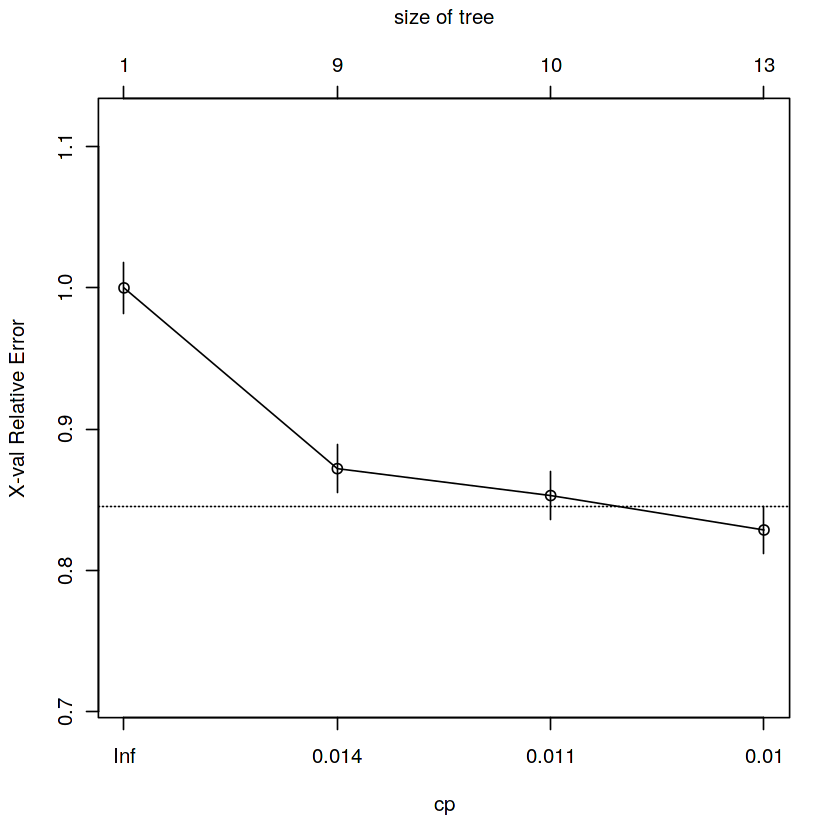

In [31]:
printcp(fit) # display the results
plotcp(fit) # visualize cross-validation results
summary(fit) # detailed summary of splits


Classification tree:
rpart(formula = Attrition ~ ., data = modeldata, method = "class")

Variables actually used in tree construction:
[1] Age              BusinessTravel   DailyRate        DistanceFromHome
[5] MonthlyIncome    OverTime         StockOptionLevel

Root node error: 2627/16312 = 0.16105

n= 16312 

        CP nsplit rel error  xerror     xstd
1 0.016495      0   1.00000 1.00000 0.017871
2 0.011420      8   0.84583 0.87210 0.016892
3 0.010659      9   0.83441 0.85306 0.016737
4 0.010000     12   0.80244 0.82870 0.016533


Warning message in rsq.rpart(fit):
“may not be applicable for this method”


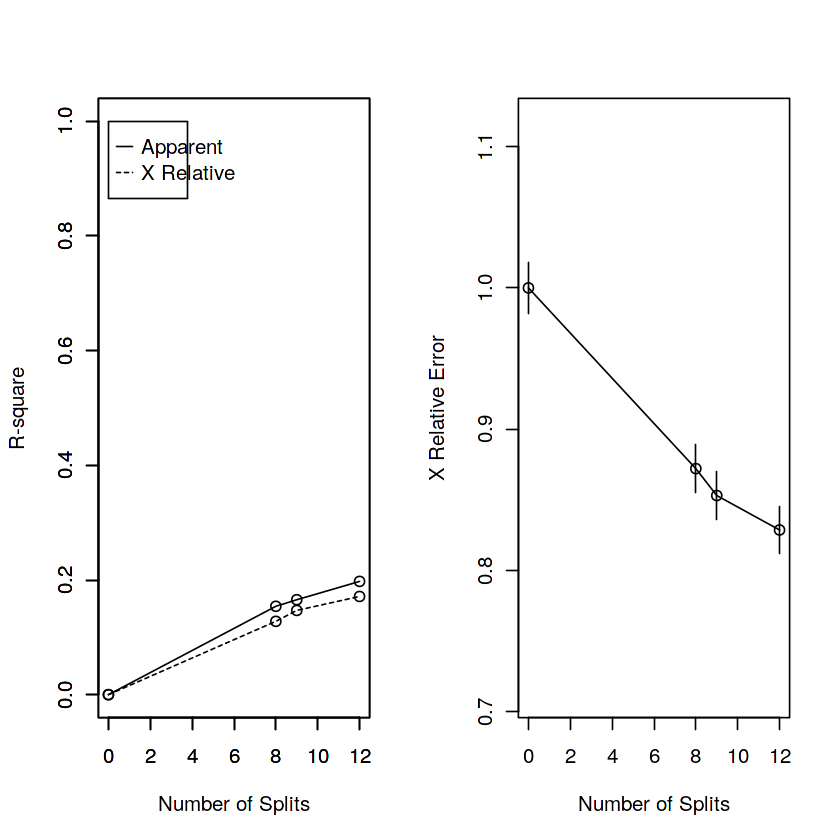

In [32]:
# create additional plots
par(mfrow=c(1,2)) # two plots on one page
rsq.rpart(fit) # visualize cross-validation results  

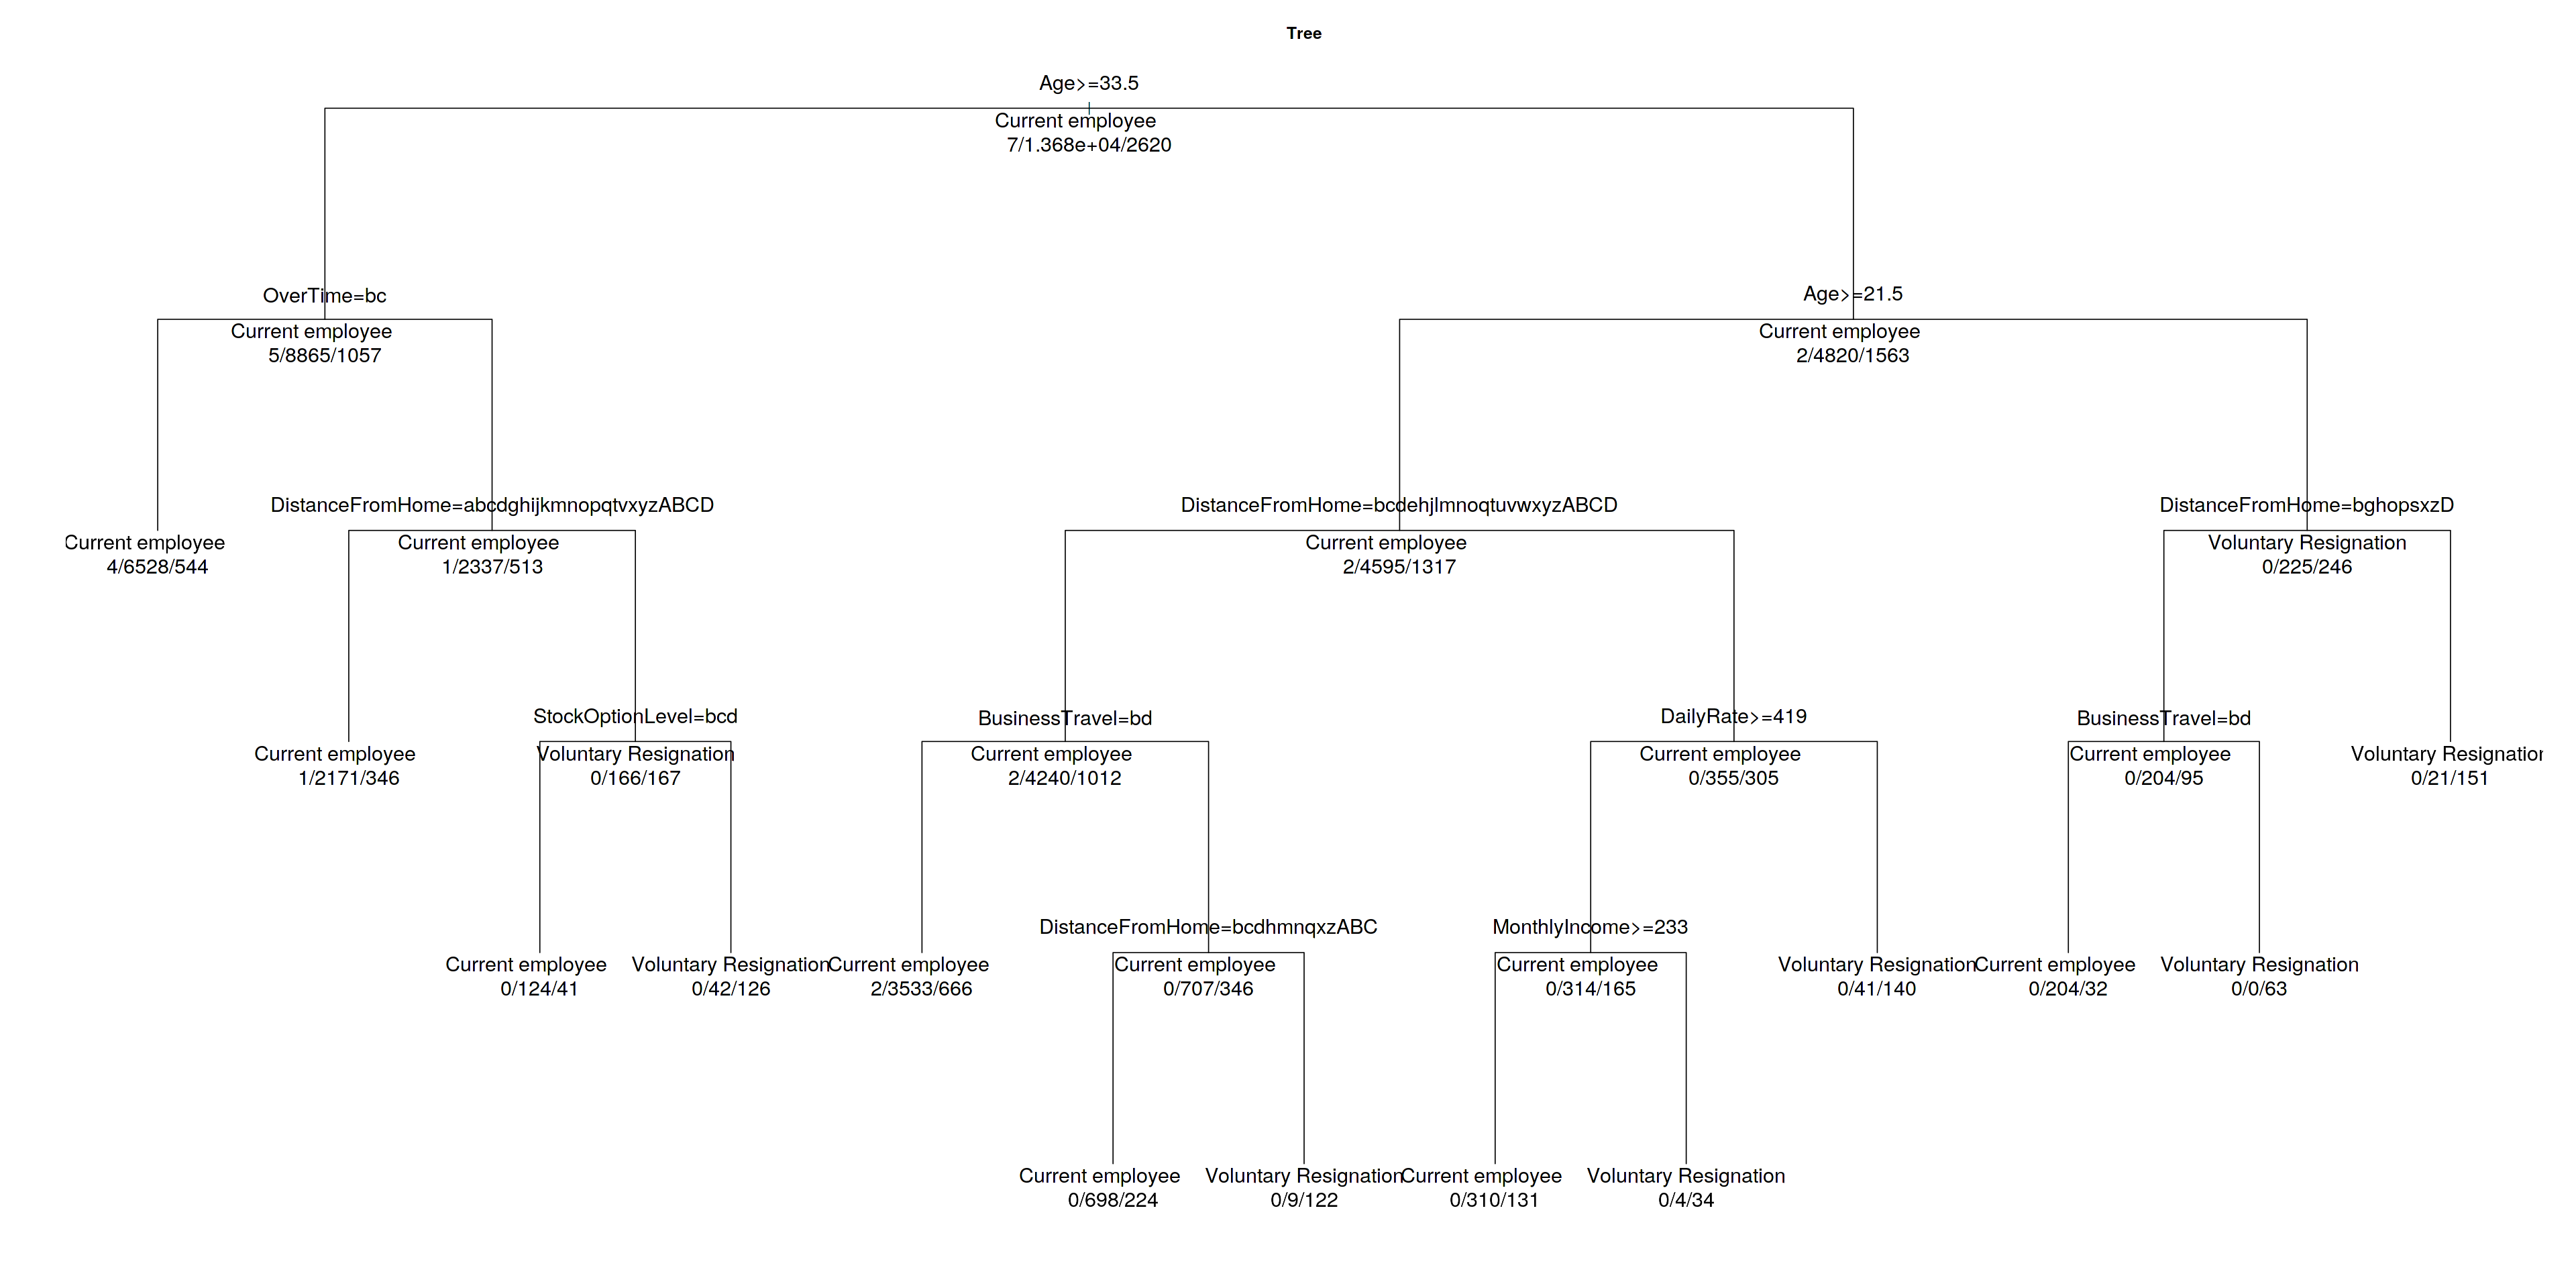

In [72]:
# plot tree
options(repr.plot.width = 32, repr.plot.height = 16)
plot(fit, uniform=TRUE,main="Tree")
text(fit, use.n=TRUE, all=TRUE, cex=1.5)

post(fit, file = "./tree.jpg",
   title = "TREE")

In [34]:
# predicting the model based upon validation data
#dt.pred <- predict(tuned.model, validationdata, type = "C-classification")
#caret::confusionMatrix(validationdata$Attrition, dt.pred)

In [35]:
#dtmodel

In [36]:
# predicting the model based upon validation data
dt.pred <- predict(fit, validationdata, type = "class")
caret::confusionMatrix(validationdata$Attrition, dt.pred)

Confusion Matrix and Statistics

                       Reference
Prediction              missing Current employee Voluntary Resignation
  missing                     0                4                     0
  Current employee            0             5862                    57
  Voluntary Resignation       0              837                   231

Overall Statistics
                                          
               Accuracy : 0.8715          
                 95% CI : (0.8635, 0.8793)
    No Information Rate : 0.9588          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2939          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: missing Class: Current employee
Sensitivity                      NA                  0.8745
Specificity               0.9994278                  0.8021
Pos Pred Value                   NA     

# Pruning Dtree

In [37]:
# Cross -validation of the model
#cv.dt <- cv.tree(fit, FUN = prune.misclass)
#names(cv.dt)
#cv.dt

In [38]:
# Loooking for best size
#best.size <- cv.dt$size[which(cv.dt$dev==min(cv.dt$dev))] 
#best.size

In [39]:
# Prunnig the model based upon the best size
#prune.dt <- prune.misclass(dtmodel, best = 5)

In [40]:
# Predicting the pruned model 
#dt.pred <- predict(prune.dt, validationdata, type = "class")

In [41]:
# Accuracy of the pruned model
#caret::confusionMatrix(validationdata$Attrition, dt.pred)